# Normal climatológica de precipitação e temperatura 
Estação 1006 - Florianópolis - Cetre/Epagri <br> 
Período analisado: Jan/2002 a Dez/2024

In [1]:
import pandas as pd
import locale
import matplotlib.pyplot as plt
import numpy as np

## Precipitação 

In [2]:
# Dados de entrada
pasta = 'C:\\Python\\Pasta_Vitoria\\inputs\\Normal_climatologica'
precipitacao = pd.read_excel(pasta+'\\precipitacao_diaria_ate_20_01_25.xls',
                             header=8,
                             index_col=0) 

# Extrair dados de Jan/2002 a Dez/2024
precipitacao = precipitacao.loc[(precipitacao.index >= '2002-01-01')&(
    precipitacao.index <= '2024-12-31')] 

In [3]:
# Identificar os meses que não tiveram nenhuma medição registrada
excluir = precipitacao.resample('ME').sum()
excluir = excluir.loc[excluir['Soma Diária'] == 0].index.tolist()
for mes in excluir: 
    print(mes)        

2009-12-31 00:00:00
2010-05-31 00:00:00
2010-06-30 00:00:00
2012-10-31 00:00:00
2012-11-30 00:00:00
2012-12-31 00:00:00
2013-01-31 00:00:00
2013-02-28 00:00:00
2013-03-31 00:00:00
2013-04-30 00:00:00


In [4]:
# Contar quantos dias com dados registrados há em cada mês 
dias_por_mes = precipitacao.index.to_series().groupby(precipitacao.index.to_period("M")).count()

# Filtrar apenas os meses completos
meses_completos = dias_por_mes[dias_por_mes >= dias_por_mes.index.days_in_month].index

# Identificar os meses incompletos 
meses_incompletos = dias_por_mes.index[~dias_por_mes.index.isin(meses_completos)]
for mes in meses_incompletos: 
    print(mes)          

2004-02
2004-03
2004-05
2004-06
2006-02
2006-03
2006-06
2010-01
2010-04
2010-07
2011-02
2011-07
2012-02
2012-03
2012-07
2012-09
2013-05
2017-02
2017-11
2018-02
2020-04
2023-01


In [5]:
# Filtrar apenas meses completos 
df_filtrado = precipitacao[precipitacao.index.to_period("M").isin(meses_completos)]

# Somatório
df_filtrado = df_filtrado.resample('ME').sum() 

# Coluna com o mês
df_filtrado['Mês'] = df_filtrado.index.month 

media = df_filtrado.groupby('Mês').mean()
desvpad = df_filtrado.groupby('Mês').std()

# df com os intervalos para posterior comparação
intervalos = pd.DataFrame()
intervalos.index = range(1,13) 
intervalos['Mínimo'] = media['Soma Diária'] - desvpad['Soma Diária']  
intervalos['Máximo'] = media['Soma Diária'] + desvpad['Soma Diária']  

intervalos 

,Mínimo,Máximo
1,43.411170,336.398395
2,16.361004,216.858996
3,46.125860,257.808923
4,18.990340,203.788790
5,15.375362,199.262030
6,9.515387,168.163744
7,6.420266,141.180604
8,15.151427,178.794660
9,64.216985,196.116928
10,65.789398,236.693210


In [6]:
for mes in meses_incompletos:
    primeiro_dia = mes.to_timestamp()  # Converte Period para Timestamp (primeiro dia do mês)
    ultimo_dia = mes.to_timestamp(how="end")  # Último dia do mês
    #print(mes)
    #print(precipitacao.loc[(precipitacao.index >= primeiro_dia) & 
     #                      (precipitacao.index <= ultimo_dia)].sum(), '\n') 

Após análise, os meses incompletos que serão desconsiderados são: <br>
- 2004-02,
- 2012-09,
- 2020-04,
- 2023-01. 

In [7]:
# Filtrar dados de precipitação, excluindo os meses mencionados 
# Somatório 
precipitacao = precipitacao.resample('ME').sum()

# Coluna com o mês
precipitacao['Mês'] = precipitacao.index.month 

# Excluir meses em que a soma foi zero (problemas de medição) 
precipitacao = precipitacao.loc[~(precipitacao['Soma Diária'] == 0)] 

# Excluir meses incompletos
excluir = pd.to_datetime(['2004-02-29', '2012-09-30', '2020-04-30', '2023-01-31'])
precipitacao = precipitacao.loc[~precipitacao.index.isin(excluir)]  

In [8]:
# Extrair valores mínimos, médios e máximos
prec_min = precipitacao.groupby('Mês').min()
prec_med = precipitacao.groupby('Mês').mean() 
prec_max = precipitacao.groupby('Mês').max()

## Temperatura 

In [9]:
# Dados de entrada 
locale.setlocale(locale.LC_TIME, 'Portuguese_Brazil.1252') # Para reconhecer que as datas estão em português 
temp_min = pd.read_excel(pasta+'\\temp_min_mensal_ate_20_01_25.xls',
                         header=8,
                         usecols=[1,2,3,4],
                         index_col=1)
temp_min.index =  pd.to_datetime(temp_min.index, format='%d/%m/%Y %H:%M') 

temp_med = pd.read_excel(pasta+'\\temp_med_mensal_ate_20_01_25.xls',
                             header=8,
                             index_col=0)
temp_med.index = pd.to_datetime(temp_med.index, format='%b %Y')

temp_max = pd.read_excel(pasta+'\\temp_max_mensal_ate_20_01_25.xls',
                         header=8,
                         usecols=[1,2,3,4],
                         index_col=1)
temp_max.index =  pd.to_datetime(temp_max.index, format='%d/%m/%Y %H:%M')  

In [10]:
# Extrair dados de Jan/2002 a Dez/2024
temp_min = temp_min.loc[(temp_min.index >= '2002-01-01')&(
    temp_min.index <= '2024-12-31')]
temp_med = temp_med.loc[(temp_med.index >= '2002-01-01')&(
    temp_med.index <= '2024-12-31')]
temp_max = temp_max.loc[(temp_max.index >= '2002-01-01')&(
    temp_max.index <= '2024-12-31')]


# Coluna com o mês
temp_min['Mês'] = temp_min.index.month 
temp_med['Mês'] = temp_med.index.month 
temp_max['Mês'] = temp_max.index.month 

In [11]:
# Extrair valores mínimos, médios e máximos
temp_min = temp_min.groupby('Mês').mean()
temp_med = temp_med.groupby('Mês').mean() 
temp_max = temp_max.groupby('Mês').mean()

# Período de Set/2023 a Set/2024
## Precipitação 

In [12]:
# Extrair dados de Set/2023 a Set/2024
precipitacao = precipitacao.loc[(precipitacao.index >= '2023-09-01')&(
    precipitacao.index <= '2024-09-30')] 

In [13]:
# Extrair valores mínimos, médios e máximos
prec_min_proj = precipitacao.groupby('Mês').min()
prec_med_proj = precipitacao.groupby('Mês').mean() 
prec_max_proj = precipitacao.groupby('Mês').max()

## Temperatura 

In [14]:
# Dados de entrada 
locale.setlocale(locale.LC_TIME, 'Portuguese_Brazil.1252') # Para reconhecer que as datas estão em português 
temp_min_proj = pd.read_excel(pasta+'\\temp_min_mensal_ate_20_01_25.xls',
                         header=8,
                         usecols=[1,2,3,4],
                         index_col=1)
temp_min_proj.index =  pd.to_datetime(temp_min_proj.index, format='%d/%m/%Y %H:%M') 

temp_med_proj = pd.read_excel(pasta+'\\temp_med_mensal_ate_20_01_25.xls',
                             header=8,
                             index_col=0)
temp_med_proj.index = pd.to_datetime(temp_med_proj.index, format='%b %Y')

temp_max_proj = pd.read_excel(pasta+'\\temp_max_mensal_ate_20_01_25.xls',
                         header=8,
                         usecols=[1,2,3,4],
                         index_col=1)
temp_max_proj.index =  pd.to_datetime(temp_max_proj.index, format='%d/%m/%Y %H:%M')  

In [15]:
# Extrair dados de Set/2023 a Set/2024
temp_min_proj = temp_min_proj.loc[(temp_min_proj.index >= '2023-09-01')&(
    temp_min_proj.index <= '2024-09-30')]
temp_med_proj = temp_med_proj.loc[(temp_med_proj.index >= '2023-09-01')&(
    temp_med_proj.index <= '2024-09-30')]
temp_max_proj = temp_max_proj.loc[(temp_max_proj.index >= '2023-09-01')&(
    temp_max_proj.index <= '2024-09-30')]


# Coluna com o mês
temp_min_proj['Mês'] = temp_min_proj.index.month 
temp_med_proj['Mês'] = temp_med_proj.index.month 
temp_max_proj['Mês'] = temp_max_proj.index.month 

In [16]:
# Extrair valores mínimos, médios e máximos
temp_min_proj = temp_min_proj.groupby('Mês').mean()
temp_med_proj = temp_med_proj.groupby('Mês').mean() 
temp_max_proj = temp_max_proj.groupby('Mês').mean()

# Gráfico 

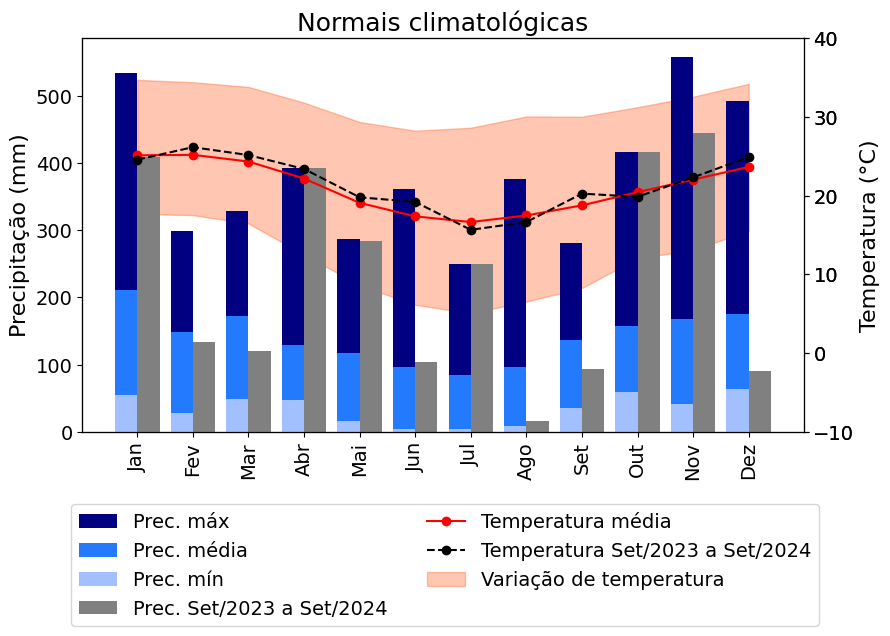

In [18]:
rotulos = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
           'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'] 

x = np.arange(len(rotulos))  # Posições base no eixo X
largura = 0.4  # Largura das barras

fig, ax1 = plt.subplots(figsize=(9,5)) 

ax2 = ax1.twinx()
ax3 = ax1.twinx()

ax3.fill_between(x, 
                 temp_min['Mínimo Mensal'], 
                 temp_max['Máximo Mensal'], 
                 color='orangered', 
                 alpha=0.3, 
                 label='Variação de temperatura')  

temp, = ax2.plot(x,
                 temp_med['Média Mensal'],
                 marker='o',
                 color='red',
                 label='Temperatura média')
temp, = ax2.plot(x,
                 temp_med_proj['Média Mensal'],
                 marker='o',
                 linestyle='--',
                 color='black',
                 label='Temperatura Set/2023 a Set/2024')

ax1.bar(x - largura/2, 
        prec_max['Soma Diária'], 
        width = largura, 
        color='navy', 
        label='Prec. máx')
ax1.bar(x - largura/2, 
        prec_med['Soma Diária'], 
        width = largura, 
        color='xkcd:clear blue',
        label='Prec. média')
ax1.bar(x - largura/2, 
        prec_min['Soma Diária'],
        width = largura, 
        color='xkcd:pastel blue',
        label='Prec. mín')

ax1.bar(x + largura/2, 
        prec_med_proj['Soma Diária'], 
        width = largura, 
        color='gray',
        label='Prec. Set/2023 a Set/2024')

ax1.set_zorder(2)
ax2.set_zorder(3)
ax3.set_zorder(1)
ax1.patch.set_visible(False)  # prevents ax1 from hiding ax2

ax1.set_xticks(x)  # Define as posições dos ticks
ax1.set_xticklabels(rotulos, rotation=90)  

#ax2.set_ylim(temp_min['Mínimo Mensal'].min(), temp_max['Máximo Mensal'].max())
#ax3.set_ylim(temp_min['Mínimo Mensal'].min(), temp_max['Máximo Mensal'].max())
ax2.set_ylim(-10, 40)
ax3.set_ylim(-10, 40)

ax1.set_ylabel('Precipitação (mm)', fontsize=16)
ax2.set_ylabel('Temperatura (°C)', fontsize=16) 
plt.title('Normais climatológicas', fontsize=18) 

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

fig.legend(loc='upper center', 
           bbox_to_anchor=(0.5, 0), 
           ncol=2, 
           fontsize=14)

fig.tight_layout()
plt.savefig("C:\\Python\\Pasta_Vitoria\\outputs\\normais_climatologicas.png",
            bbox_inches='tight')

In [19]:
prec_min

,Soma Diária,Registros,Falhas
Mês,,,
1,55.23,465,0
2,28.00,144,0
3,49.48,600,0
4,48.00,600,0
5,16.80,168,0
6,4.29,536,0
7,4.55,288,0
8,9.37,712,0
9,35.51,690,0


In [20]:
prec_med

,Soma Diária,Registros,Falhas
Mês,,,
1,211.311905,728.714286,2.714286
2,148.174286,624.666667,2.761905
3,171.842273,732.727273,1.454545
4,128.560476,713.333333,0.952381
5,117.822273,700.045455,3.590909
6,96.181364,704.454545,3.545455
7,85.102609,711.260870,2.478261
8,96.973043,740.086957,3.913043
9,136.083636,716.818182,3.181818


In [21]:
prec_max

,Soma Diária,Registros,Falhas
Mês,,,
1,534.00,744,16
2,298.62,696,32
3,328.60,744,19
4,393.00,720,6
5,287.14,744,50
6,361.60,720,42
7,249.60,744,36
8,375.85,744,32
9,280.37,720,30


In [22]:
temp_min

,Mínimo Mensal,Registros,Falhas
Mês,,,
1,17.689091,29.818182,1.181818
2,17.536818,26.818182,1.454545
3,16.475455,30.181818,0.818182
4,12.521364,29.272727,0.727273
5,8.620000,28.227273,2.772727
6,6.143636,28.363636,1.636364
7,5.057391,28.956522,2.043478
8,6.555217,30.304348,0.695652
9,8.270870,29.086957,0.913043


In [23]:
temp_med

,Média Mensal,Registros,Falhas
Mês,,,
1,25.135948,30.045455,0.954545
2,25.200319,26.909091,1.363636
3,24.350488,30.318182,0.681818
4,22.186008,29.227273,0.772727
5,19.098182,28.409091,2.590909
6,17.383571,28.363636,1.636364
7,16.660560,29.173913,1.826087
8,17.493592,30.260870,0.739130
9,18.779781,29.217391,0.782609


In [24]:
temp_max

,Máximo Mensal,Registros,Falhas
Mês,,,
1,34.727727,29.863636,1.136364
2,34.431818,26.772727,1.500000
3,33.832273,30.272727,0.727273
4,31.837273,29.181818,0.818182
5,29.378636,28.545455,2.454545
6,28.270455,28.409091,1.590909
7,28.646522,29.086957,1.913043
8,30.079130,30.304348,0.695652
9,30.045652,29.173913,0.826087


In [25]:
prec_min_proj

,Soma Diária,Registros,Falhas
Mês,,,
1,408.6,744,0
2,133.2,696,0
3,120.6,744,0
4,393.0,720,0
5,284.4,744,0
6,103.2,720,0
7,249.6,743,1
8,16.6,743,1
9,93.8,719,0


In [26]:
prec_med_proj

,Soma Diária,Registros,Falhas
Mês,,,
1,408.6,744.0,0.0
2,133.2,696.0,0.0
3,120.6,744.0,0.0
4,393.0,720.0,0.0
5,284.4,744.0,0.0
6,103.2,720.0,0.0
7,249.6,743.0,1.0
8,16.6,743.0,1.0
9,94.0,719.5,0.5


In [27]:
prec_max_proj

,Soma Diária,Registros,Falhas
Mês,,,
1,408.6,744,0
2,133.2,696,0
3,120.6,744,0
4,393.0,720,0
5,284.4,744,0
6,103.2,720,0
7,249.6,743,1
8,16.6,743,1
9,94.2,720,1


In [28]:
temp_min_proj

,Mínimo Mensal,Registros,Falhas
Mês,,,
1,18.310,31.0,0.0
2,18.080,29.0,0.0
3,18.530,31.0,0.0
4,13.600,30.0,0.0
5,9.240,31.0,0.0
6,6.460,30.0,0.0
7,4.900,30.0,1.0
8,4.040,30.0,1.0
9,8.575,29.5,0.5


In [29]:
temp_med_proj

,Média Mensal,Registros,Falhas
Mês,,,
1,24.583548,31.0,0.0
2,26.172759,29.0,0.0
3,25.170968,31.0,0.0
4,23.407667,30.0,0.0
5,19.802903,31.0,0.0
6,19.217333,30.0,0.0
7,15.672667,30.0,1.0
8,16.657000,30.0,1.0
9,20.270626,29.5,0.5


In [30]:
temp_max_proj

,Máximo Mensal,Registros,Falhas
Mês,,,
1,34.82,31.0,0.0
2,35.01,29.0,0.0
3,34.34,31.0,0.0
4,31.45,30.0,0.0
5,32.97,31.0,0.0
6,32.40,30.0,0.0
7,26.80,30.0,1.0
8,26.79,30.0,1.0
9,33.00,29.5,0.5
